#Student Name: Murali Krishnan Rajasekharan Pillai
#ECE 595 Machine Learning II
#Project 3: GAN - Generative-Adversarial Networks

In [1]:
!nvidia-smi

Mon Oct 28 18:53:35 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
IMAGE_PATH = './gdrive/My Drive/ece595_ml2/images/'
MODEL_PATH = './gdrive/My Drive/ece595_ml2/models/'

In [4]:
#Import necessary packages
import numpy as np
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
from keras.models import load_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


#Part 1: Implementing the GAN

In [0]:
#Load MNIST data and normalize to [-1, 1]
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train - 127.5) / 127.5
X_test = (X_test - 127.5) / 127.5
X_train = X_train.reshape(-1, 784)

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
# The D-dimensional noise vector length
latent_dim = 100

In [0]:
# Optimizer for discriminator, which will have a higher learning rate than adversarial model
gan_adam = adam(lr=2e-4)
dis_adam = adam(lr=5e-5, beta_1=0.5)
gen_adam = adam(lr=5e-5, beta_1=0.5)

In [0]:
# Genrerator model
def create_generator(latent_dim):
    generator = Sequential()
    generator.add(Dense(250, input_dim=latent_dim))
    generator.add(LeakyReLU(0.5))
    generator.add(Dense(550))
    generator.add(LeakyReLU(0.5))
    generator.add(Dense(1100))
    generator.add(LeakyReLU(0.5))
    generator.add(Dense(784, activation='tanh'))
    generator.compile(loss='binary_crossentropy',
                      optimizer=gen_adam,
                      metrics=['accuracy'])
    return generator

In [0]:
# Discriminator model
def create_discriminator(data_dim):
    discriminator = Sequential()
    discriminator.add(Dense(1100, input_dim=data_dim))
    discriminator.add(LeakyReLU(0.5))
    discriminator.add(Dropout(0.3))
    discriminator.add(Dense(550))
    discriminator.add(LeakyReLU(0.5))
    discriminator.add(Dropout(0.3))
    discriminator.add(Dense(250))
    discriminator.add(LeakyReLU(0.5))
    discriminator.add(Dense(1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy',
                          optimizer=dis_adam,
                          metrics=['accuracy'])
    return discriminator

In [0]:
# Create adversarial model
def create_gan(discriminator, generator):
    discriminator.trainable = False
    ganInput = Input(shape=(latent_dim, ))
    x = generator(ganInput)
    ganOutput = discriminator(x)
    gan = Model(inputs=ganInput, outputs=ganOutput)
    gan.compile(loss='binary_crossentropy',
                optimizer=gan_adam,
                metrics=['accuracy'])
    return gan

In [0]:
# Creating GAN
generator = create_generator(latent_dim)
discriminator = create_discriminator(X_train.shape[1])
gan = create_gan(discriminator, generator)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Model and training parameters
#ASSIGN VALUES TO THE FOLLOWING VARIABLES
epochs = 100000
batch_size = 128 
sample_interval = 10000

# Array to save training history
training_meta_data = np.zeros([epochs, 4])

In [0]:
def saveModels(epoch):
    generator.save(MODEL_PATH + 'gan_generator_epoch_%d.h5' % epoch)
    discriminator.save(MODEL_PATH + 'gan_discriminator_epoch_%d.h5' % epoch)









Epoch 10000
10000: [Discriminator loss: 0.521202, acc: 0.441406]  [GAN loss: 1.617595, acc: 0.093750]


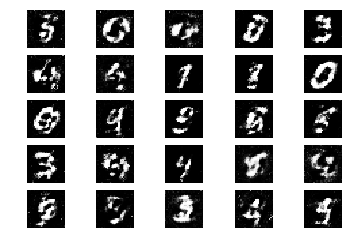

Epoch 20000
20000: [Discriminator loss: 0.578431, acc: 0.398438]  [GAN loss: 1.271461, acc: 0.132812]


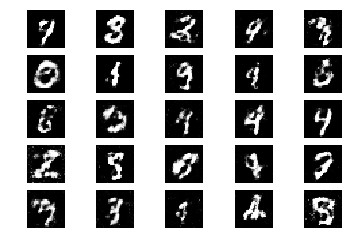

Epoch 30000
30000: [Discriminator loss: 0.608065, acc: 0.367188]  [GAN loss: 1.221969, acc: 0.203125]


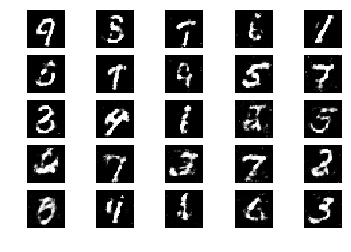

Epoch 40000
40000: [Discriminator loss: 0.574095, acc: 0.386719]  [GAN loss: 1.515417, acc: 0.101562]


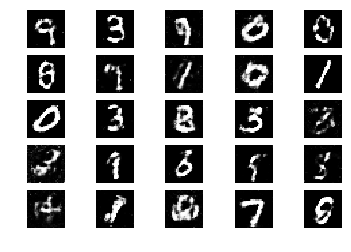

Epoch 50000
50000: [Discriminator loss: 0.532118, acc: 0.433594]  [GAN loss: 1.446576, acc: 0.109375]


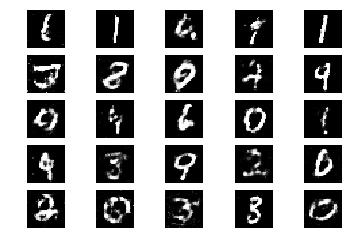

Epoch 60000
60000: [Discriminator loss: 0.598145, acc: 0.402344]  [GAN loss: 1.193942, acc: 0.132812]


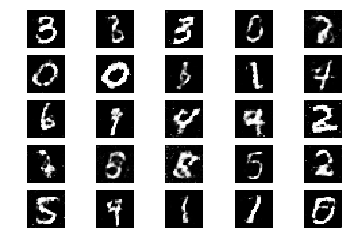

Epoch 70000
70000: [Discriminator loss: 0.541928, acc: 0.417969]  [GAN loss: 1.295970, acc: 0.179688]


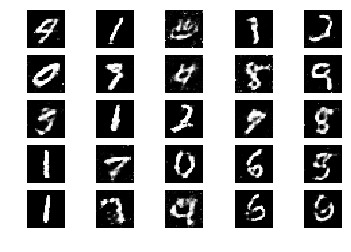

Epoch 80000
80000: [Discriminator loss: 0.548826, acc: 0.425781]  [GAN loss: 1.199958, acc: 0.234375]


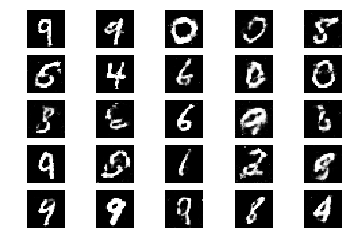

Epoch 90000
90000: [Discriminator loss: 0.527998, acc: 0.402344]  [GAN loss: 1.254974, acc: 0.187500]


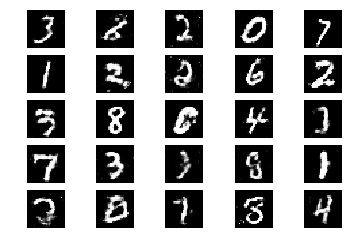

Epoch 100000
100000: [Discriminator loss: 0.542299, acc: 0.402344]  [GAN loss: 1.264699, acc: 0.218750]


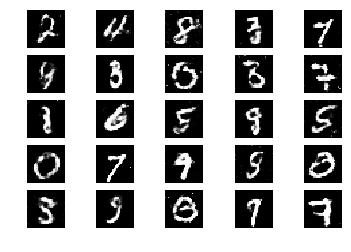

In [0]:
# Training the GAN
for e in range(1, epochs+1):

  # Generate random noise as input
  noise = np.random.normal(0, 1, size=[batch_size, latent_dim])
  # Generate fake MNIST images from generated noise
  generated_images = generator.predict(noise)

  # Get a random set of real MNIST images
  real_images = X_train[np.random.randint(0, X_train.shape[0], size=batch_size)]

  # Concatenate real and fake images into a single array (or batch)
  X = np.concatenate([real_images, generated_images])
  # Assign training labels (assign high probability, but not 1, to real images)
  yDis = np.zeros(2*batch_size)
  yDis[:batch_size] = 0.9

  # Allow discriminator parameters to be updated
  discriminator.trainable = True

  # Train discriminator on batch of real and fake images. Assign loss and accuracy to variable
  d_loss = discriminator.train_on_batch(X, yDis)

  # Train adversarial model and try to fool discriminator (with incorrect label) 
  # by generating a new batch of noise and assign them labels of real data
  noise = np.random.normal(0, 1, size=[batch_size, latent_dim])
  yGen = np.ones(batch_size)

  # Keep discriminator weights constant while training generator
  discriminator.trainable = False

  # Train GAN (without updating discriminator weights) on new batch of fake images. Assign loss and accuracy to variable
  gan_loss = gan.train_on_batch(noise, yGen)

  # Save training status
  # Discriminator and model loss
  training_meta_data[e-1, 0] = d_loss[0]
  training_meta_data[e-1, 1] = gan_loss[0]

  # Discriminator and model accuracy
  training_meta_data[e-1, 2] = d_loss[1]
  training_meta_data[e-1, 3] = gan_loss[1]


  # If at sample interval, print training status and save samples
  if e % sample_interval == 0:
    # Print training status
    print("Epoch %d" %e)
    log_mesg = "%d: [Discriminator loss: %f, acc: %f]" % (e, d_loss[0], d_loss[1])
    log_mesg = "%s  [GAN loss: %f, acc: %f]" % (log_mesg, gan_loss[0], gan_loss[1])
    print(log_mesg)
    saveModels(e)
        
    # Plot images 
    r, c = 5, 5

    # Create images from the noise (predict the outcome of the noise)
    gen_imgs = generator.predict(noise)
    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
      for j in range(c):
        axs[i,j].imshow((gen_imgs[cnt].reshape(28, 28)), cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
    plt.show()

In [0]:
import pickle
with open(MODEL_PATH + "gan_model_meta_data.pickle","wb") as f:
  pickle.dump(training_meta_data, f)

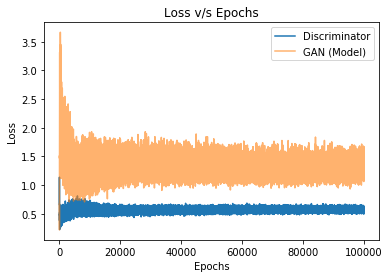

In [0]:
# Plot model loss vs epoch
plt.plot(training_meta_data[:, 0], label="Discriminator")
plt.plot(training_meta_data[:, 1], label="GAN (Model)", alpha=0.6)
plt.title("Loss v/s Epochs")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
fig.tight_layout()

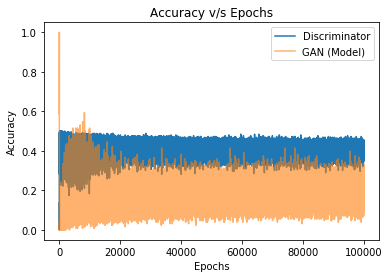

In [0]:
# Plot accuracy vs epoch
plt.plot(training_meta_data[:, 2], label="Discriminator")
plt.plot(training_meta_data[:, 3], label="GAN (Model)", alpha=0.6)
plt.title("Accuracy v/s Epochs")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
fig.tight_layout()

Answer the following questions:



1.   Why does the accuracy of the discriminator remain around 50%? Is this a good trait of the GAN? 

  ANS: As the generator improves with training, the discriminator performance gets worse because the discriminator cannot easily tell the difference between real and fake. If the generator succeeds perfectly, then the discriminator has a 50% accuracy which is equivalent to a completely blind guess.


2.   How could this model be modified to produce cleaner (less noisy) images? 

  ANS: One method of developing a smooth generator (one that produces less noisy images) is to limit the input perturbation. This couples with a gradient penalized generator can generate stable and high-quality images.

#Part 2: Generating samples using trained generator

In [5]:
generator = load_model(MODEL_PATH + 'gan_generator_epoch_100000.h5')











Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# The D-dimensional noise vector length
latent_dim = 100
noise = np.random.normal(0, 1, size=[10, latent_dim])
# Generate fake MNIST images from generated noise
generated_images = generator.predict(noise)
g_scaled = generated_images.reshape(-1, 28, 28)
generated_images = (g_scaled * 127.5 + 127.5 ) / 255.

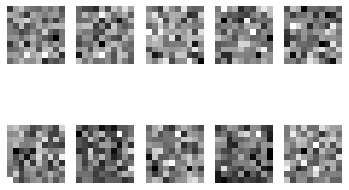

In [23]:
# Visualize generated noise
r, c = 2, 5
fig, axs = plt.subplots(r, c)
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow((noise[cnt].reshape(10, 10)), cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

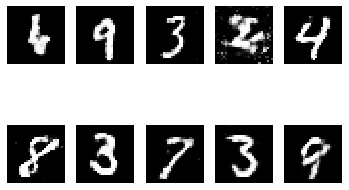

In [24]:
# Visualize generated samples
r, c = 2, 5
fig, axs = plt.subplots(r, c)
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow((generated_images[cnt].reshape(28, 28)), cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

#Part 3: Testing accuracy of generated images on ten samples

In [0]:
# Load mnist classifier and generated images
mnist_classifier = load_model('./gdrive/My Drive/ece595_ml2/mnist_classifier.h5')

In [0]:
# ASSIGN CLASSES
labels = [4, 9, 3, 3, 4, 8, 3, 7, 3, 9]

# Convert integer labels to one-hot labels 
labels = keras.utils.np_utils.to_categorical(labels, num_classes=10)

In [0]:
print(mnist_classifier.model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


In [27]:
# Show classifications
# k = mnist_classifier.predict(generated_images.reshape(-1,784))
k = mnist_classifier.evaluate(generated_images.reshape(-1,784), labels)

10/10 [==============================] - 0s 15ms/step


In [28]:
print(k)

[0.6521979570388794, 0.800000011920929]


In [0]:
labels = [4, 9, 3, 3, 4, 8, 3, 7, 3, 9]
kink = mnist_classifier.predict(generated_images.reshape(-1,784))

In [0]:
predictions = np.argmax(kink, axis=1)

In [0]:
accuracy = sum(labels == predictions)/ len(labels)

In [54]:
print("Accuracy of the classifier on the 10 generated images: ", accuracy * 100, "%")

Accuracy of the classifier on the 10 generated images:  80.0 %


1. State the accuracy of the classifier on your ten generated images.  Based on this accuracy, would you say your generator does well in producing images comparable to those in the MNIST dataset of hand-written digits?  Why or why not?

ANS: The accuracy of the classifier on the 10 generated images is 80%. Based on 
this accuracy, it seems that the generator does a poor job in producing images compared to the MNIST dataset.
I think this because the generated images from the generator are _noisy_ in comparison to the original MNIST dataset. Hence, the classifier has not been trained to handle noisy datasets. 


2. In this project, we only tested the performance of the pre-trained classifier on ten samples and used its result to determine the robustness of the generator.  How could we better assess the quality of the generated images using this pre-trained classifier and the saved generator?

ANS: For better assessing the quality of the generated images, we would have to measure the accuracy over a larger dataset. But it would become cumbersome for humans to manually label all the generated images for testing it's accuracy with a trained MNIST classifier. 
We could develop a semi-supervised learner (SSL) for clustering similar images, where the human can manually label some data points and the SSL can be used to automatically label the generated dataset. This can then be used to evaluate the effectiveness of the generator, as we would have more instances of clustered data.